### IMDB EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"D:\data cleaning ML\IMDB\IMDB.xlsx")
df.head()

,rating_id,user_id,movie_id,rating,timestamp,device,watch_time_min,watch_mode,review_text,is_verified_rating,...,production_company,platform,rating_certification,rating_zscore,genre_popularity,user_activity_score,revenue_ratio,time_since_release,avg_user_rating,temporal_drift_flag
0,1,2040,2270,3.2,2025-01-03,Mobile,179.6,Online,Brilliant direction.,True,...,Studio_16,Disney+,G,-0.303,96,14,1.91,33,4.04,True
1,2,1628,47,4.3,2012-09-28,Mobile,98.7,Online,Brilliant direction.,False,...,Studio_192,Hulu,PG-13,0.664,1781,11,19.83,7,3.24,False
2,3,3277,2326,5.0,2010-10-09,Web,97.6,Online,Plot was weak.,False,...,Studio_67,Prime,R,1.280,115,17,1.45,24,3.71,True
3,4,548,1510,2.8,2012-04-05,Mobile,46.4,Online,Brilliant direction.,False,...,Studio_482,Netflix,PG,-0.655,88,9,140.68,35,3.89,True
4,5,129,1495,3.6,2015-08-04,Web,52.7,Online,Plot was weak.,False,...,Studio_14,Prime,R,0.049,96,7,38.79,34,3.61,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41200 entries, 0 to 41199
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rating_id                41200 non-null  int64         
 1   user_id                  41200 non-null  int64         
 2   movie_id                 41200 non-null  int64         
 3   rating                   41200 non-null  float64       
 4   timestamp                41200 non-null  datetime64[ns]
 5   device                   41200 non-null  object        
 6   watch_time_min           41200 non-null  float64       
 7   watch_mode               41200 non-null  object        
 8   review_text              41200 non-null  object        
 9   is_verified_rating       41200 non-null  bool          
 10  rating_context           41200 non-null  object        
 11  bias_flag                41200 non-null  bool          
 12  name                     41200 n

In [4]:
df.columns

Index(['rating_id', 'user_id', 'movie_id', 'rating', 'timestamp', 'device',
       'watch_time_min', 'watch_mode', 'review_text', 'is_verified_rating',
       'rating_context', 'bias_flag', 'name', 'gender', 'age', 'occupation',
       'income', 'country_user', 'signup_date', 'device_type_user',
       'membership_level', 'avg_watch_time_per_week', 'is_active', 'title',
       'release_year', 'release_month', 'genres', 'duration_min', 'language',
       'country_movie', 'budget_million', 'box_office_million', 'imdb_score',
       'critics_rating', 'awards_won', 'production_company', 'platform',
       'rating_certification', 'rating_zscore', 'genre_popularity',
       'user_activity_score', 'revenue_ratio', 'time_since_release',
       'avg_user_rating', 'temporal_drift_flag'],
      dtype='object')

In [5]:
df.shape

(41200, 45)

In [6]:
df.describe()

,rating_id,user_id,movie_id,rating,timestamp,watch_time_min,age,income,signup_date,avg_watch_time_per_week,...,box_office_million,imdb_score,critics_rating,awards_won,rating_zscore,genre_popularity,user_activity_score,revenue_ratio,time_since_release,avg_user_rating
count,41200.000000,41200.000000,41200.000000,41200.000000,41200,41200.000000,40377.000000,4.037900e+04,41200,41200.000000,...,40385.000000,41200.000000,41200.000000,41200.000000,41200.000000,41200.000000,41200.000000,39576.000000,41200.000000,41200.000000
mean,20006.847039,1745.384369,1254.962354,3.544774,2017-11-19 10:16:41.009708800,100.326233,45.833073,7.361686e+05,2017-10-12 01:12:39.844659968,5.943726,...,152.186818,6.515944,70.001760,0.198180,0.000020,885.157961,12.814320,56.252660,30.777039,3.544723
min,1.000000,1.000000,1.000000,0.500000,2010-01-01 00:00:00,20.000000,13.000000,2.500000e+05,2010-01-01 00:00:00,0.000000,...,1.120000,2.200000,37.100000,0.000000,-2.679000,5.000000,2.000000,0.070000,-14.000000,2.300000
25%,10007.750000,864.000000,629.000000,2.800000,2013-12-10 00:00:00,60.700000,29.000000,4.000000e+05,2013-11-19 00:00:00,2.800000,...,79.760000,5.800000,63.600000,0.000000,-0.655000,75.000000,10.000000,11.150000,12.000000,3.320000
50%,20010.500000,1741.000000,1255.000000,3.500000,2017-11-25 00:00:00,100.500000,46.000000,6.000000e+05,2017-11-13 00:00:00,5.000000,...,155.480000,6.500000,70.100000,0.000000,-0.039000,1395.000000,13.000000,28.790000,31.000000,3.520000
75%,30005.250000,2626.000000,1878.000000,4.200000,2021-10-29 00:00:00,140.500000,63.000000,9.000000e+05,2021-07-19 00:00:00,8.100000,...,224.300000,7.200000,76.600000,0.000000,0.576000,1551.000000,15.000000,65.190000,49.000000,3.740000
max,40000.000000,3500.000000,2500.000000,10.000000,2025-09-30 00:00:00,180.000000,79.000000,1.500000e+06,2025-09-26 00:00:00,33.100000,...,299.950000,9.500000,98.000000,3.000000,5.679000,1781.000000,26.000000,1764.930000,75.000000,5.750000
std,11547.959315,1012.417916,721.116655,1.136737,NaN,46.117590,19.177245,4.431935e+05,NaN,4.143927,...,85.450325,0.994309,9.857328,0.441067,0.999926,735.621018,3.483141,90.612969,22.138560,0.339173


In [7]:
df.isnull().sum()

rating_id                     0
user_id                       0
movie_id                      0
rating                        0
timestamp                     0
device                        0
watch_time_min                0
watch_mode                    0
review_text                   0
is_verified_rating            0
rating_context                0
bias_flag                     0
name                          0
gender                        0
age                         823
occupation                    0
income                      821
country_user                  0
signup_date                   0
device_type_user              0
membership_level              0
avg_watch_time_per_week       0
is_active                     0
title                         0
release_year                  0
release_month                 0
genres                        0
duration_min                821
language                      0
country_movie                 0
budget_million              820
box_offi

#### Observations ---
#### Missing values ---
#### age - 823 income - 821  duration_min == 821   budget_million == 820  boxoffmillion - 815   revenue ratio -- 1624

In [8]:
df.drop(['budget_million','box_office_million','income'],axis = 1,inplace = True)

In [9]:
df['age']= df['age'].fillna(df['age'].mean())

In [10]:
df['duration_min']= df['duration_min'].fillna(df['duration_min'].mean())

In [11]:
df.isnull().sum()

rating_id                     0
user_id                       0
movie_id                      0
rating                        0
timestamp                     0
device                        0
watch_time_min                0
watch_mode                    0
review_text                   0
is_verified_rating            0
rating_context                0
bias_flag                     0
name                          0
gender                        0
age                           0
occupation                    0
country_user                  0
signup_date                   0
device_type_user              0
membership_level              0
avg_watch_time_per_week       0
is_active                     0
title                         0
release_year                  0
release_month                 0
genres                        0
duration_min                  0
language                      0
country_movie                 0
imdb_score                    0
critics_rating                0
awards_w

In [12]:
df['revenue_ratio'] = df['revenue_ratio'].fillna(df['revenue_ratio'].median())

In [13]:
df.isnull().sum()

rating_id                  0
user_id                    0
movie_id                   0
rating                     0
timestamp                  0
device                     0
watch_time_min             0
watch_mode                 0
review_text                0
is_verified_rating         0
rating_context             0
bias_flag                  0
name                       0
gender                     0
age                        0
occupation                 0
country_user               0
signup_date                0
device_type_user           0
membership_level           0
avg_watch_time_per_week    0
is_active                  0
title                      0
release_year               0
release_month              0
genres                     0
duration_min               0
language                   0
country_movie              0
imdb_score                 0
critics_rating             0
awards_won                 0
production_company         0
platform                   0
rating_certifi

In [14]:
df.drop_duplicates(subset=['user_id', 'movie_id'], keep='first', inplace=True)

In [15]:
df.shape

(39916, 42)

#### Changing data types
#### Convert timestamp to datetime format
#### Convert release_year to numeric
#### Standardize genres to lowercase string

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'],errors = 'coerce')
df['release_year'] = pd.to_numeric(df['release_year'],errors = 'coerce')
df['genres'] = df['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))
df['genres'] = df['genres'].str.lower().str.strip()

In [17]:
df['language'] = df['language'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))
df['language']= df['language'].str.lower().str.strip()
df['platform'] = df['platform'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))
df['platform']= df['platform'].str.lower().str.strip()

In [18]:
from scipy.stats import zscore
outlier_cols = ['age', 'duration_min', 'revenue_ratio']
df = df[(np.abs(zscore(df[outlier_cols], nan_policy='omit')) < 3).all(axis=1)]


In [19]:
df.columns

Index(['rating_id', 'user_id', 'movie_id', 'rating', 'timestamp', 'device',
       'watch_time_min', 'watch_mode', 'review_text', 'is_verified_rating',
       'rating_context', 'bias_flag', 'name', 'gender', 'age', 'occupation',
       'country_user', 'signup_date', 'device_type_user', 'membership_level',
       'avg_watch_time_per_week', 'is_active', 'title', 'release_year',
       'release_month', 'genres', 'duration_min', 'language', 'country_movie',
       'imdb_score', 'critics_rating', 'awards_won', 'production_company',
       'platform', 'rating_certification', 'rating_zscore', 'genre_popularity',
       'user_activity_score', 'revenue_ratio', 'time_since_release',
       'avg_user_rating', 'temporal_drift_flag'],
      dtype='object')

In [20]:
df['genres'] = df['genres'].str.split(', ')
df_exploded = df.explode('genres')
df_exploded = df_exploded.dropna(subset=['rating'])
# df['genres'] = df['genres'].str.strip().str.lower()

In [21]:
df.shape

(39248, 42)

In [22]:
df.describe()

,rating_id,user_id,movie_id,rating,timestamp,watch_time_min,age,signup_date,avg_watch_time_per_week,release_year,...,duration_min,imdb_score,critics_rating,awards_won,rating_zscore,genre_popularity,user_activity_score,revenue_ratio,time_since_release,avg_user_rating
count,39248.000000,39248.000000,39248.000000,39248.000000,39248,39248.000000,39248.000000,39248,39248.000000,39248.000000,...,39248.000000,39248.000000,39248.000000,39248.000000,39248.000000,39248.000000,39248.000000,39248.000000,39248.000000,39248.000000
mean,19983.242051,1744.287531,1256.392096,3.545839,2017-11-22 06:50:18.100285184,100.452505,45.813433,2017-10-15 14:58:23.139013632,5.944025,1986.610655,...,124.238884,6.514859,69.957631,0.198125,0.000957,888.380376,12.779173,47.304257,30.789212,3.545327
min,1.000000,1.000000,1.000000,0.500000,2010-01-01 00:00:00,20.000000,13.000000,2010-01-01 00:00:00,0.000000,1950.000000,...,70.000000,2.900000,37.100000,0.000000,-2.679000,5.000000,2.000000,0.070000,-14.000000,2.300000
25%,9977.750000,863.000000,632.000000,2.800000,2013-12-11 18:00:00,60.875000,30.000000,2013-11-24 00:00:00,2.800000,1968.000000,...,97.000000,5.800000,63.500000,0.000000,-0.655000,75.000000,10.000000,11.360000,12.000000,3.320000
50%,19968.500000,1739.000000,1259.000000,3.500000,2017-12-01 00:00:00,100.700000,45.833073,2017-11-19 00:00:00,5.000000,1986.000000,...,124.361178,6.500000,70.000000,0.000000,-0.039000,1395.000000,13.000000,28.790000,31.000000,3.520000
75%,29977.250000,2624.000000,1879.000000,4.200000,2021-11-01 06:00:00,140.600000,62.000000,2021-07-19 00:00:00,8.100000,2006.000000,...,152.000000,7.200000,76.600000,0.000000,0.576000,1551.000000,15.000000,60.730000,49.000000,3.740000
max,40000.000000,3500.000000,2500.000000,10.000000,2025-09-30 00:00:00,180.000000,79.000000,2025-09-26 00:00:00,33.100000,2024.000000,...,179.000000,9.500000,98.000000,3.000000,5.679000,1781.000000,26.000000,319.330000,75.000000,5.750000
std,11550.049768,1011.937311,720.833703,1.138063,NaN,46.121609,18.987759,NaN,4.145329,21.648015,...,31.659477,0.990095,9.888941,0.441883,1.001093,735.051309,3.479803,55.568129,22.138314,0.339407


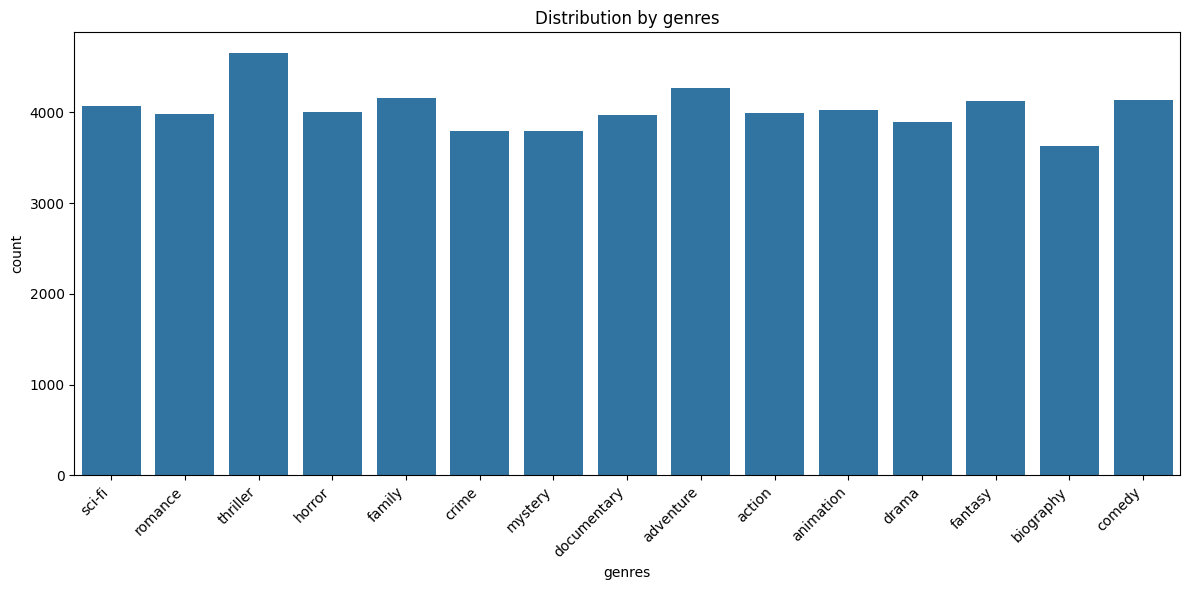

In [23]:
df['genres'] = df['genres'].apply(lambda x: x if isinstance(x, list) else [x])
df_exploded = df.explode('genres')
plt.figure(figsize=(12,6))
sns.countplot(x='genres', data=df_exploded)
plt.title("Distribution by genres")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### From the above countplot graph we can see that the thriller has the most count and the lowest is biography 

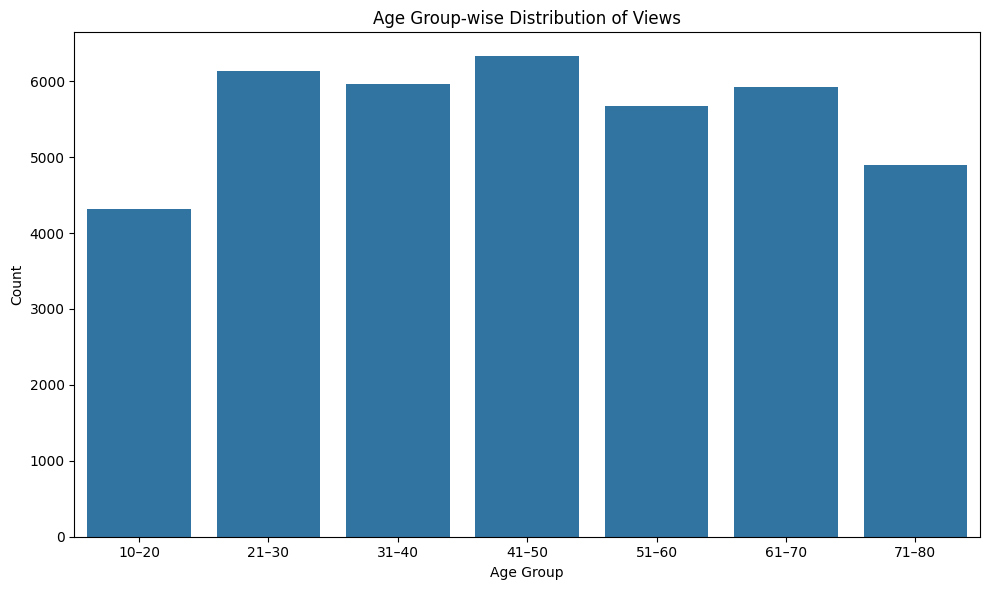

In [24]:
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df)
plt.title("Age Group-wise Distribution of Views")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


#### from above plot we can see that the 41-50 and 21-30 age group sees the movies more than others and 10-2- sees the least

In [25]:
print(df_exploded['genres'].value_counts())
print(df_exploded.head())


genres
thriller       4651
adventure      4267
family         4165
comedy         4137
fantasy        4129
sci-fi         4074
animation      4026
horror         4007
action         3998
romance        3985
documentary    3977
drama          3895
crime          3800
mystery        3794
biography      3629
Name: count, dtype: int64
   rating_id  user_id  movie_id  rating  timestamp  device  watch_time_min  \
0          1     2040      2270     3.2 2025-01-03  Mobile           179.6   
0          1     2040      2270     3.2 2025-01-03  Mobile           179.6   
1          2     1628        47     4.3 2012-09-28  Mobile            98.7   
2          3     3277      2326     5.0 2010-10-09     Web            97.6   
2          3     3277      2326     5.0 2010-10-09     Web            97.6   

  watch_mode           review_text  is_verified_rating  ...  \
0     Online  Brilliant direction.                True  ...   
0     Online  Brilliant direction.                True  ...   
1     Onl

In [26]:
print(df['genres'].head(10))


0           [sci-fi, romance]
1                  [thriller]
2            [horror, family]
3            [crime, mystery]
4           [sci-fi, romance]
5               [documentary]
6                 [adventure]
7         [action, animation]
8            [horror, family]
9    [family, drama, romance]
Name: genres, dtype: object


In [27]:
print(df.columns)  # Check for correct column name
print(df[['genres']].dropna().head(10))  # See actual genre values


Index(['rating_id', 'user_id', 'movie_id', 'rating', 'timestamp', 'device',
       'watch_time_min', 'watch_mode', 'review_text', 'is_verified_rating',
       'rating_context', 'bias_flag', 'name', 'gender', 'age', 'occupation',
       'country_user', 'signup_date', 'device_type_user', 'membership_level',
       'avg_watch_time_per_week', 'is_active', 'title', 'release_year',
       'release_month', 'genres', 'duration_min', 'language', 'country_movie',
       'imdb_score', 'critics_rating', 'awards_won', 'production_company',
       'platform', 'rating_certification', 'rating_zscore', 'genre_popularity',
       'user_activity_score', 'revenue_ratio', 'time_since_release',
       'avg_user_rating', 'temporal_drift_flag', 'age_group'],
      dtype='object')
                     genres
0         [sci-fi, romance]
1                [thriller]
2          [horror, family]
3          [crime, mystery]
4         [sci-fi, romance]
5             [documentary]
6               [adventure]
7       [

In [28]:
# Check how many non-null genre entries exist
print(df['genres'].notna().sum())

# Inspect a few rows from the original dataset
print(df[['title', 'genres']].head(10))


39248
        title                    genres
0  Movie_2270         [sci-fi, romance]
1    Movie_47                [thriller]
2  Movie_2326          [horror, family]
3  Movie_1510          [crime, mystery]
4  Movie_1495         [sci-fi, romance]
5  Movie_1046             [documentary]
6  Movie_1662               [adventure]
7   Movie_335       [action, animation]
8  Movie_1101          [horror, family]
9    Movie_22  [family, drama, romance]


In [29]:
df_raw = pd.read_excel(r"D:\data cleaning ML\IMDB\IMDB.xlsx")  # Replace with actual path
print(df_raw.columns)
print(df_raw[['title', 'genres']].dropna().head(10))


Index(['rating_id', 'user_id', 'movie_id', 'rating', 'timestamp', 'device',
       'watch_time_min', 'watch_mode', 'review_text', 'is_verified_rating',
       'rating_context', 'bias_flag', 'name', 'gender', 'age', 'occupation',
       'income', 'country_user', 'signup_date', 'device_type_user',
       'membership_level', 'avg_watch_time_per_week', 'is_active', 'title',
       'release_year', 'release_month', 'genres', 'duration_min', 'language',
       'country_movie', 'budget_million', 'box_office_million', 'imdb_score',
       'critics_rating', 'awards_won', 'production_company', 'platform',
       'rating_certification', 'rating_zscore', 'genre_popularity',
       'user_activity_score', 'revenue_ratio', 'time_since_release',
       'avg_user_rating', 'temporal_drift_flag'],
      dtype='object')
        title                  genres
0  Movie_2270         Sci-Fi, Romance
1    Movie_47                Thriller
2  Movie_2326          Horror, Family
3  Movie_1510          Crime, Mystery

C:\Users\pc\AppData\Local\Temp\ipykernel_19460\3561801559.py:54: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


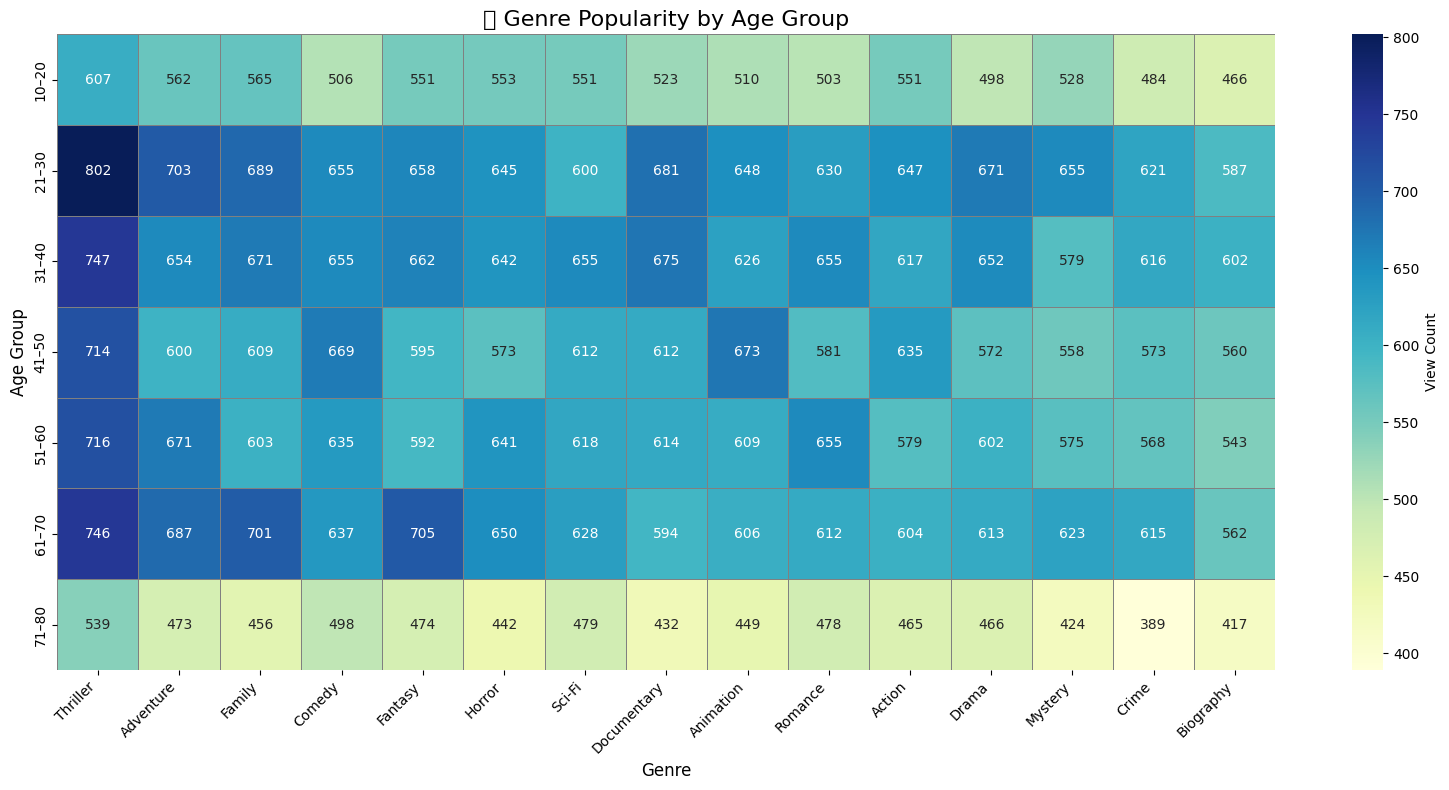

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define age bins and labels
bins = [10, 21, 31, 41, 51, 61, 71, 81]
labels = ['10–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80']

# Step 2: Drop rows with missing age or genre
df_raw = df_raw.dropna(subset=['age', 'genres'])

# Step 3: Create age group column
df_raw['age_group'] = pd.cut(df_raw['age'], bins=bins, labels=labels)

# Step 4: Split genres into lists (comma-separated)
df_raw['genres'] = df_raw['genres'].astype(str).str.split(',')

# Step 5: Strip whitespace from genre names
df_raw['genres'] = df_raw['genres'].apply(lambda x: [g.strip() for g in x])

# Step 6: Explode genres so each genre has its own row
df_exploded = df_raw.explode('genres')

# Step 7: Group by age group and genre to count occurrences
genre_by_age = (
    df_exploded.groupby(['age_group', 'genres'], observed=True)
    .size()
    .reset_index(name='count')
)

# Step 8: Create pivot table for heatmap
pivot_table = genre_by_age.pivot(index='age_group', columns='genres', values='count').fillna(0)

# Step 9: Sort genres by total popularity for better layout
sorted_genres = pivot_table.sum(axis=0).sort_values(ascending=False).index
pivot_table = pivot_table[sorted_genres]

# Step 10: Plot enhanced heatmap
plt.figure(figsize=(16, 8))  # Wider layout for clarity
sns.heatmap(
    pivot_table,
    cmap='YlGnBu',
    annot=True,
    fmt='g',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'View Count'}
)
plt.title("🎬 Genre Popularity by Age Group", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [31]:
df.columns

Index(['rating_id', 'user_id', 'movie_id', 'rating', 'timestamp', 'device',
       'watch_time_min', 'watch_mode', 'review_text', 'is_verified_rating',
       'rating_context', 'bias_flag', 'name', 'gender', 'age', 'occupation',
       'country_user', 'signup_date', 'device_type_user', 'membership_level',
       'avg_watch_time_per_week', 'is_active', 'title', 'release_year',
       'release_month', 'genres', 'duration_min', 'language', 'country_movie',
       'imdb_score', 'critics_rating', 'awards_won', 'production_company',
       'platform', 'rating_certification', 'rating_zscore', 'genre_popularity',
       'user_activity_score', 'revenue_ratio', 'time_since_release',
       'avg_user_rating', 'temporal_drift_flag', 'age_group'],
      dtype='object')

##### From all the above observations we see that in every age group the THRILLER Group has almost in top 3 or  the top
#### The Biography is at the bottom/ less watched in every age group

In [32]:
df['genres'].head()

0    [sci-fi, romance]
1           [thriller]
2     [horror, family]
3     [crime, mystery]
4    [sci-fi, romance]
Name: genres, dtype: object

C:\Users\pc\AppData\Local\Temp\ipykernel_19460\1068147410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='rating', palette='Set2')


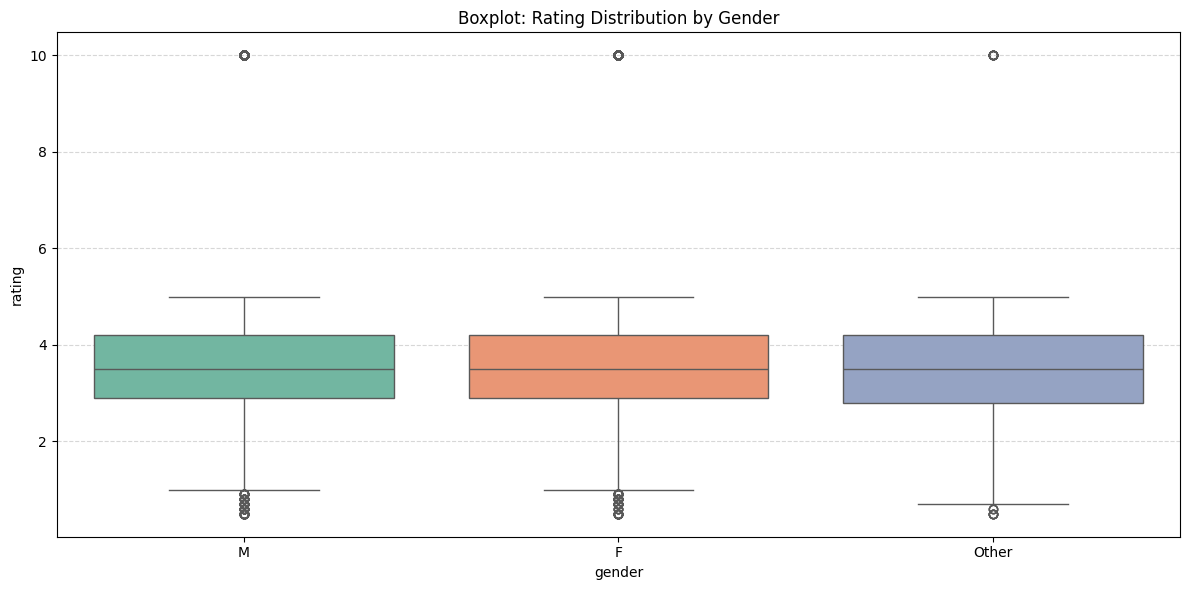

C:\Users\pc\AppData\Local\Temp\ipykernel_19460\1068147410.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='occupation', y='rating', palette='Set3')


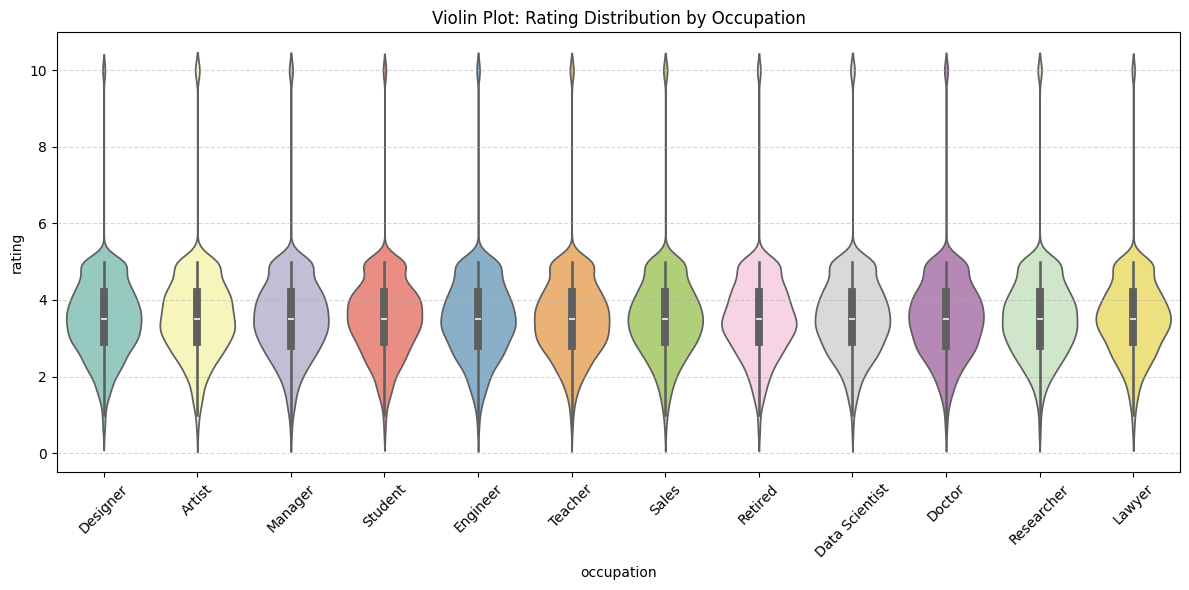

C:\Users\pc\AppData\Local\Temp\ipykernel_19460\1068147410.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='occupation', y='rating', palette='Set3')


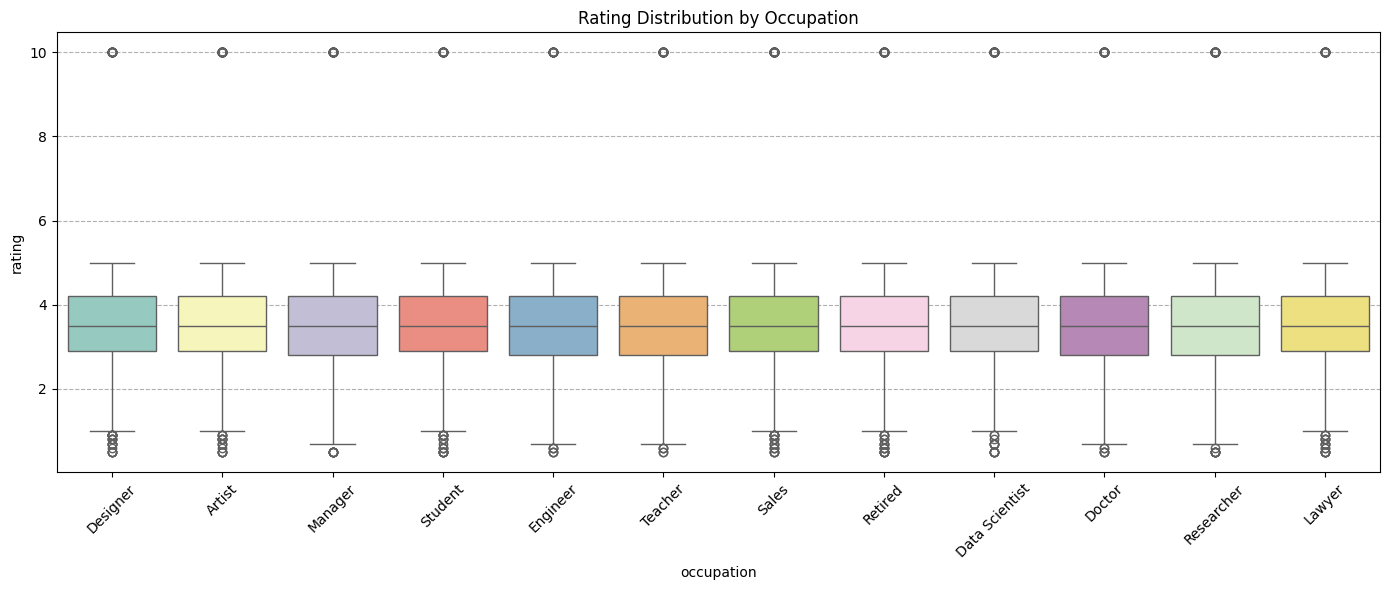

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='gender', y='rating', palette='Set2')
plt.title('Boxplot: Rating Distribution by Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='occupation', y='rating', palette='Set3')
plt.title('Violin Plot: Rating Distribution by Occupation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='occupation', y='rating', palette='Set3')
plt.title('Rating Distribution by Occupation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_19460\341870508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='platform', palette='coolwarm')


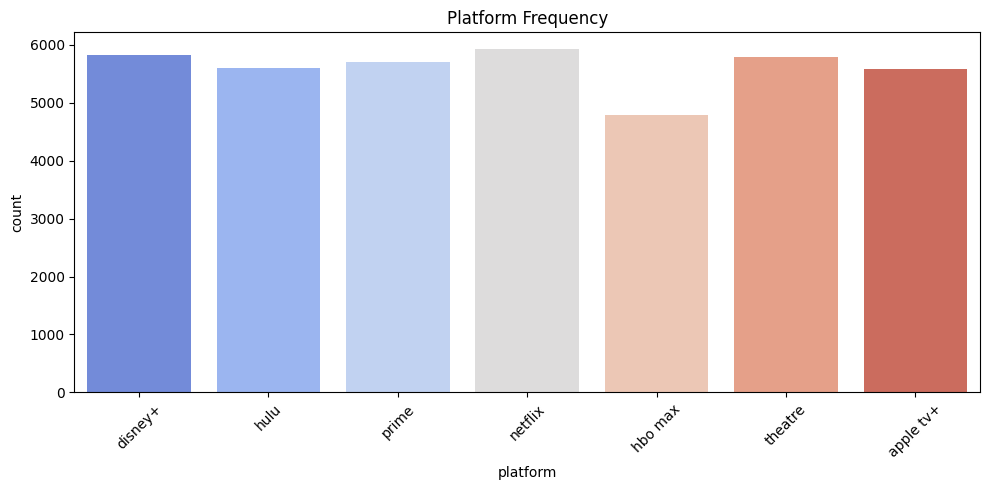

C:\Users\pc\AppData\Local\Temp\ipykernel_19460\341870508.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating_certification', palette='mako')


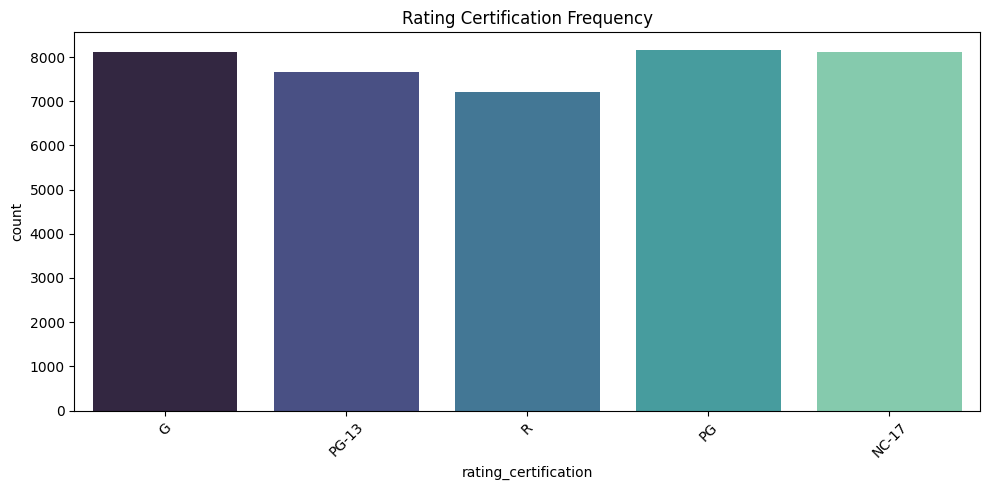

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='platform', palette='coolwarm')
plt.title('Platform Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating_certification', palette='mako')
plt.title('Rating Certification Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


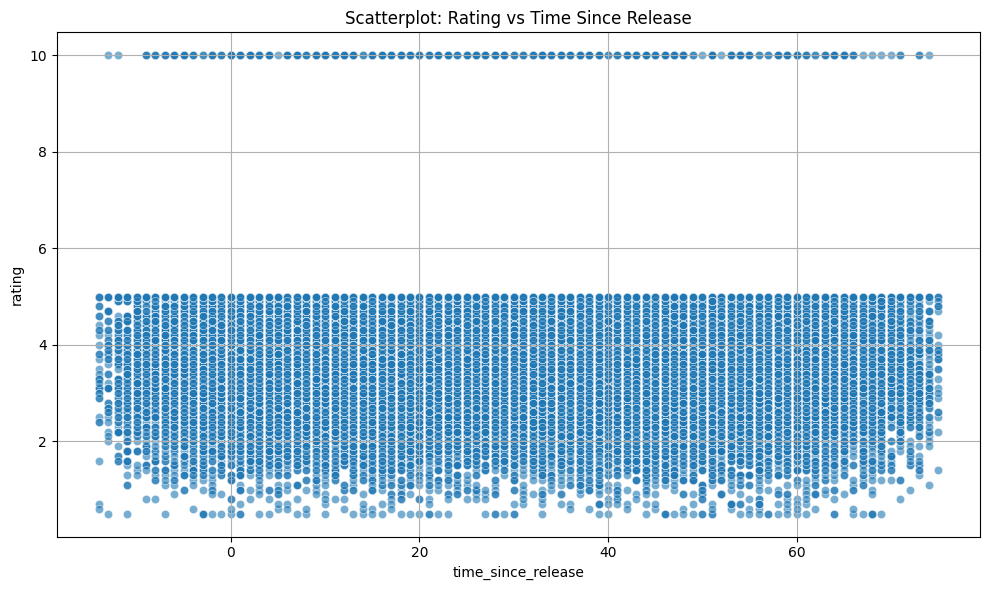

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='time_since_release', y='rating', alpha=0.6)
plt.title('Scatterplot: Rating vs Time Since Release')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_19460\2675786606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='temporal_drift_flag', y='rating', palette='coolwarm')


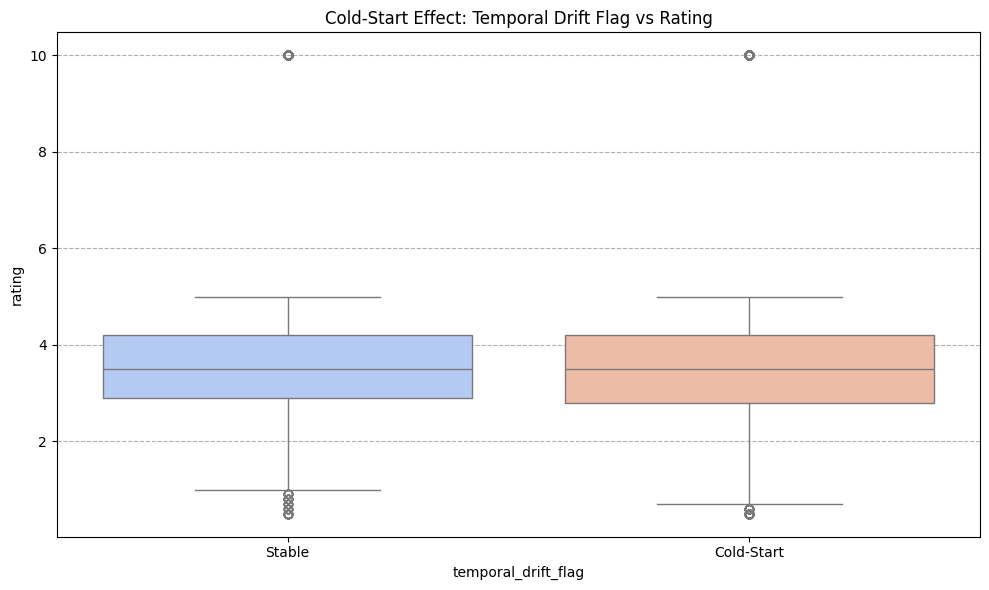

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='temporal_drift_flag', y='rating', palette='coolwarm')
plt.title('Cold-Start Effect: Temporal Drift Flag vs Rating')
plt.xticks([0, 1], ['Stable', 'Cold-Start'])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [37]:
df['gender_binary'] = df['gender'].map({'M': 0, 'F': 1})
df['verified_rating'] = df['is_verified_rating'].map({'False': 0, 'True': 1})

In [38]:
df.head()

,rating_id,user_id,movie_id,rating,timestamp,device,watch_time_min,watch_mode,review_text,is_verified_rating,...,rating_zscore,genre_popularity,user_activity_score,revenue_ratio,time_since_release,avg_user_rating,temporal_drift_flag,age_group,gender_binary,verified_rating
0,1,2040,2270,3.2,2025-01-03,Mobile,179.6,Online,Brilliant direction.,True,...,-0.303,96,14,1.91,33,4.04,True,51–60,0.0,NaN
1,2,1628,47,4.3,2012-09-28,Mobile,98.7,Online,Brilliant direction.,False,...,0.664,1781,11,19.83,7,3.24,False,31–40,1.0,NaN
2,3,3277,2326,5.0,2010-10-09,Web,97.6,Online,Plot was weak.,False,...,1.280,115,17,1.45,24,3.71,True,41–50,1.0,NaN
3,4,548,1510,2.8,2012-04-05,Mobile,46.4,Online,Brilliant direction.,False,...,-0.655,88,9,140.68,35,3.89,True,71–80,1.0,NaN
4,5,129,1495,3.6,2015-08-04,Web,52.7,Online,Plot was weak.,False,...,0.049,96,7,38.79,34,3.61,True,51–60,0.0,NaN


In [39]:
df['rating_year'] = df['timestamp'].dt.year
df['rating_month'] = df['timestamp'].dt.month
df['rating_day'] = df['timestamp'].dt.day
df['rating_weekday'] = df['timestamp'].dt.dayofweek 


In [40]:
df.head()

,rating_id,user_id,movie_id,rating,timestamp,device,watch_time_min,watch_mode,review_text,is_verified_rating,...,time_since_release,avg_user_rating,temporal_drift_flag,age_group,gender_binary,verified_rating,rating_year,rating_month,rating_day,rating_weekday
0,1,2040,2270,3.2,2025-01-03,Mobile,179.6,Online,Brilliant direction.,True,...,33,4.04,True,51–60,0.0,NaN,2025,1,3,4
1,2,1628,47,4.3,2012-09-28,Mobile,98.7,Online,Brilliant direction.,False,...,7,3.24,False,31–40,1.0,NaN,2012,9,28,4
2,3,3277,2326,5.0,2010-10-09,Web,97.6,Online,Plot was weak.,False,...,24,3.71,True,41–50,1.0,NaN,2010,10,9,5
3,4,548,1510,2.8,2012-04-05,Mobile,46.4,Online,Brilliant direction.,False,...,35,3.89,True,71–80,1.0,NaN,2012,4,5,3
4,5,129,1495,3.6,2015-08-04,Web,52.7,Online,Plot was weak.,False,...,34,3.61,True,51–60,0.0,NaN,2015,8,4,1


In [41]:
df.drop('timestamp',axis = 1,inplace = True)

device
Mobile    23520
Web       13671
Tablet     2057
Name: count, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_19460\3797160639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='device', order=device_counts.index, palette='pastel')


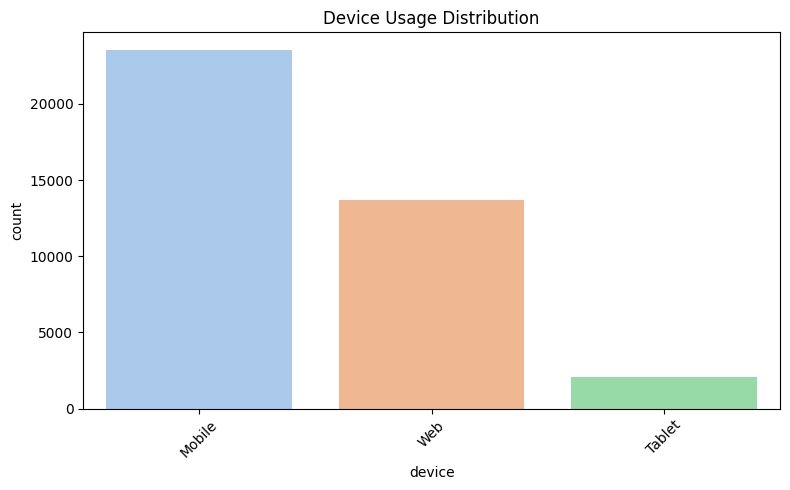

In [42]:
device_counts = df['device'].value_counts()
print(device_counts)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='device', order=device_counts.index, palette='pastel')
plt.title('Device Usage Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
df.head()

,rating_id,user_id,movie_id,rating,device,watch_time_min,watch_mode,review_text,is_verified_rating,rating_context,...,time_since_release,avg_user_rating,temporal_drift_flag,age_group,gender_binary,verified_rating,rating_year,rating_month,rating_day,rating_weekday
0,1,2040,2270,3.2,Mobile,179.6,Online,Brilliant direction.,True,New Release,...,33,4.04,True,51–60,0.0,NaN,2025,1,3,4
1,2,1628,47,4.3,Mobile,98.7,Online,Brilliant direction.,False,First Watch,...,7,3.24,False,31–40,1.0,NaN,2012,9,28,4
2,3,3277,2326,5.0,Web,97.6,Online,Plot was weak.,False,Recommendation,...,24,3.71,True,41–50,1.0,NaN,2010,10,9,5
3,4,548,1510,2.8,Mobile,46.4,Online,Brilliant direction.,False,First Watch,...,35,3.89,True,71–80,1.0,NaN,2012,4,5,3
4,5,129,1495,3.6,Web,52.7,Online,Plot was weak.,False,Recommendation,...,34,3.61,True,51–60,0.0,NaN,2015,8,4,1


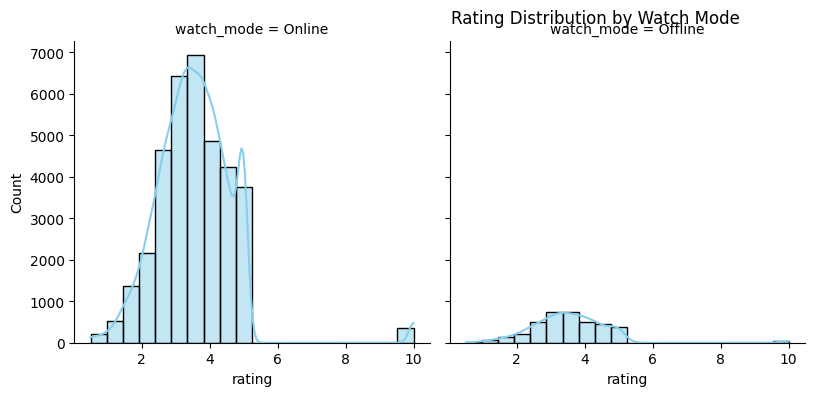

In [44]:
g = sns.FacetGrid(df, col='watch_mode', col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, 'rating', bins=20, kde=True, color='skyblue')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Rating Distribution by Watch Mode')
plt.show()

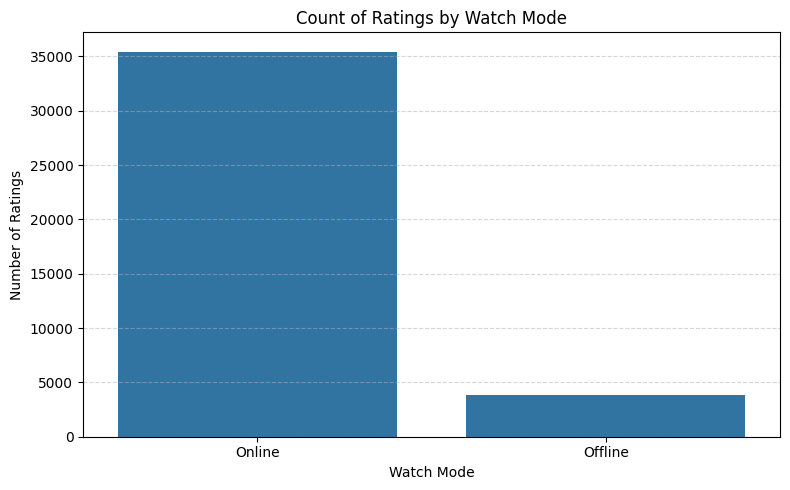

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='watch_mode')
plt.title('Count of Ratings by Watch Mode')
plt.xlabel('Watch Mode')
plt.ylabel('Number of Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [46]:
bins = [0, 20, 60, float('inf')]
labels = ['Child', 'Adult', 'Old']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
print(df['age_group'].value_counts())


age_group
Adult    24109
Old      10817
Child     4322
Name: count, dtype: int64


In [47]:
df['age_group'].head()

0    Adult
1    Adult
2    Adult
3      Old
4    Adult
Name: age_group, dtype: category
Categories (3, object): ['Child' < 'Adult' < 'Old']

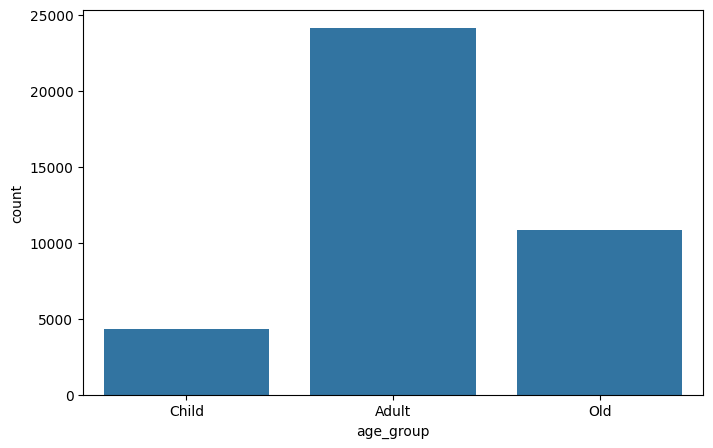

In [48]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'age_group',data =df)
plt.show()

In [49]:
# Define age bins and labels
bins = [0, 20, 60, float('inf')]
labels = ['Child', 'Adult', 'Old']

# Create the new column
df_raw['age_group'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=True)

# Optional: Preview the result
print(df_raw[['age', 'age_group']].head(10))


    age age_group
0  58.0     Adult
1  38.0     Adult
2  48.0     Adult
3  73.0       Old
4  54.0     Adult
5  55.0     Adult
6  70.0       Old
7  58.0     Adult
8  55.0     Adult
9  77.0       Old


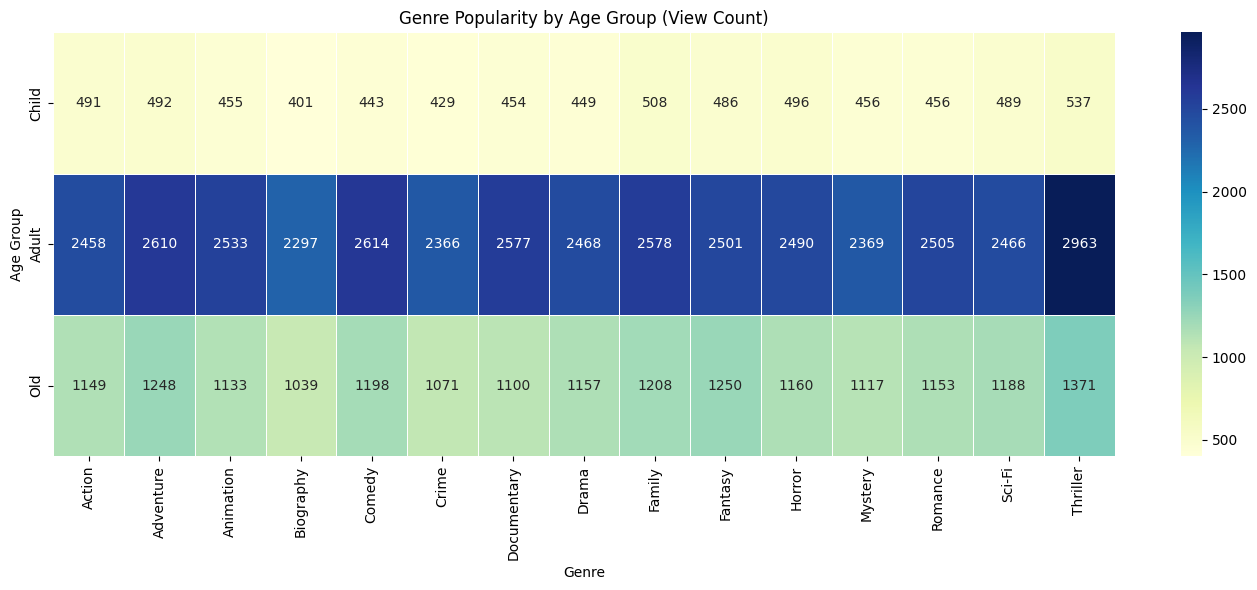

In [50]:
df_new = pd.read_excel(r"D:\data cleaning ML\IMDB\IMDB.xlsx")
df_heat = df_new.copy()
df_heat['genres'] = df_heat['genres'].str.split(',')
df_heat = df_heat.explode('genres')
df_heat['genres'] = df_heat['genres'].str.strip()

# Step 2: Create age_group column if not already present
bins = [0, 20, 60, float('inf')]
labels = ['Child', 'Adult', 'Old']
df_heat['age_group'] = pd.cut(df_heat['age'], bins=bins, labels=labels, right=True)

# Step 3: Group and pivot for heatmap
genre_age_matrix = df_heat.groupby(['age_group', 'genres'], observed=False).size().reset_index(name='count')
heatmap_data = genre_age_matrix.pivot(index='age_group', columns='genres', values='count').fillna(0)

# Step 4: Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Genre Popularity by Age Group (View Count)')
plt.xlabel('Genre')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()


In [51]:
df.columns

Index(['rating_id', 'user_id', 'movie_id', 'rating', 'device',
       'watch_time_min', 'watch_mode', 'review_text', 'is_verified_rating',
       'rating_context', 'bias_flag', 'name', 'gender', 'age', 'occupation',
       'country_user', 'signup_date', 'device_type_user', 'membership_level',
       'avg_watch_time_per_week', 'is_active', 'title', 'release_year',
       'release_month', 'genres', 'duration_min', 'language', 'country_movie',
       'imdb_score', 'critics_rating', 'awards_won', 'production_company',
       'platform', 'rating_certification', 'rating_zscore', 'genre_popularity',
       'user_activity_score', 'revenue_ratio', 'time_since_release',
       'avg_user_rating', 'temporal_drift_flag', 'age_group', 'gender_binary',
       'verified_rating', 'rating_year', 'rating_month', 'rating_day',
       'rating_weekday'],
      dtype='object')

In [52]:
df.drop(columns=['rating', 'signup_date'], inplace=True)


In [53]:
df.columns

Index(['rating_id', 'user_id', 'movie_id', 'device', 'watch_time_min',
       'watch_mode', 'review_text', 'is_verified_rating', 'rating_context',
       'bias_flag', 'name', 'gender', 'age', 'occupation', 'country_user',
       'device_type_user', 'membership_level', 'avg_watch_time_per_week',
       'is_active', 'title', 'release_year', 'release_month', 'genres',
       'duration_min', 'language', 'country_movie', 'imdb_score',
       'critics_rating', 'awards_won', 'production_company', 'platform',
       'rating_certification', 'rating_zscore', 'genre_popularity',
       'user_activity_score', 'revenue_ratio', 'time_since_release',
       'avg_user_rating', 'temporal_drift_flag', 'age_group', 'gender_binary',
       'verified_rating', 'rating_year', 'rating_month', 'rating_day',
       'rating_weekday'],
      dtype='object')

In [54]:
df['country_user'].head()

0    France
1    Canada
2        UK
3       USA
4    Brazil
Name: country_user, dtype: object

In [55]:
df.drop(columns=[
    'membership_level',
    'avg_watch_time_per_week',
    'is_active',
    'rating_day' 
], inplace=True)


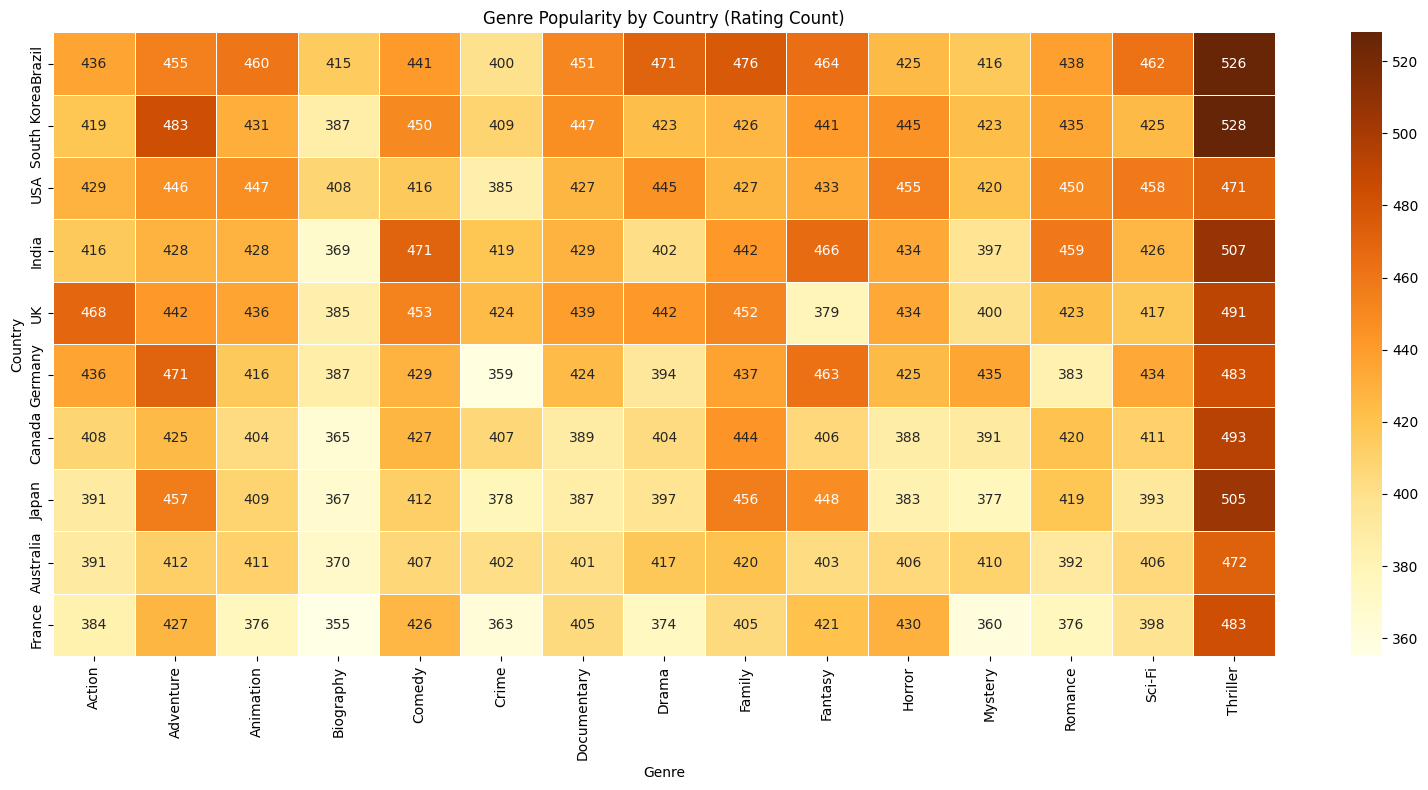

In [56]:
df_heat = df_new.copy()
df_heat['genres'] = df_heat['genres'].str.split(',')
df_heat = df_heat.explode('genres')
df_heat['genres'] = df_heat['genres'].str.strip()

# Step 2: Group and pivot
genre_country_counts = df_heat.groupby(['country_user', 'genres'], observed=False).size().reset_index(name='count')
heatmap_data = genre_country_counts.pivot(index='country_user', columns='genres', values='count').fillna(0)

# Optional: Filter top countries if needed
top_countries = heatmap_data.sum(axis=1).sort_values(ascending=False).head(20).index
heatmap_data = heatmap_data.loc[top_countries]

# Step 3: Plot
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrBr', linewidths=0.5)
plt.title('Genre Popularity by Country (Rating Count)')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Chi-Square Statistic: 33.09
Degrees of Freedom: 28
P-value: 0.2323
❌ No significant relationship detected.


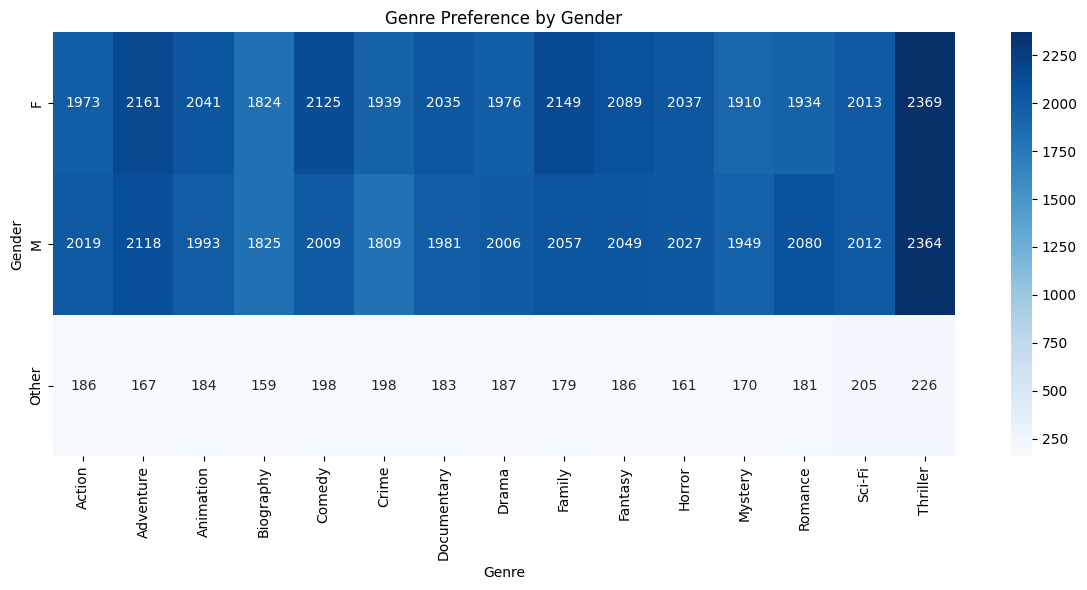

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Step 1: Prepare the data
df_clean = df_new.copy()

# Ensure genre is split and exploded
df_clean['genres'] = df_clean['genres'].str.split(',')
df_clean = df_clean.explode('genres')
df_clean['genres'] = df_clean['genres'].str.strip()

# Step 2: Create contingency table
contingency = pd.crosstab(df_clean['gender'], df_clean['genres'])

# Step 3: Run Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Step 4: Display results
print("Chi-Square Statistic:", round(chi2, 2))
print("Degrees of Freedom:", dof)
print("P-value:", round(p, 4))

if p < 0.05:
    print("✅ Significant relationship between gender and genre preference.")
else:
    print("❌ No significant relationship detected.")

# Step 5: Optional - Visualize the contingency table
plt.figure(figsize=(12, 6))
sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
plt.title('Genre Preference by Gender')
plt.xlabel('Genre')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()


In [64]:
df.columns

Index(['rating_id', 'user_id', 'movie_id', 'device', 'watch_time_min',
       'watch_mode', 'review_text', 'is_verified_rating', 'rating_context',
       'bias_flag', 'name', 'gender', 'age', 'occupation', 'country_user',
       'device_type_user', 'title', 'release_year', 'release_month', 'genres',
       'duration_min', 'language', 'country_movie', 'imdb_score',
       'critics_rating', 'awards_won', 'production_company', 'platform',
       'rating_certification', 'rating_zscore', 'genre_popularity',
       'user_activity_score', 'revenue_ratio', 'time_since_release',
       'avg_user_rating', 'temporal_drift_flag', 'age_group', 'gender_binary',
       'verified_rating', 'rating_year', 'rating_month', 'rating_weekday',
       'imdb_hit'],
      dtype='object')